# Example for Ignition

The following is a streamlined approach using YAML input to specify simulated conditions.

In [1]:
import numpy as np
import cantera as ct
import pandas as pd
import yaml
import multiprocessing as mp

In [2]:
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings(action='error')
warnings.filterwarnings("ignore", ".*Using or importing the ABCs from *")

In [3]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


## 1. Function/Class Definitions



In [4]:
import ctwrap as cw
from ctwrap import modules as cw_modules
from ctwrap import fileio as cw_fileio
cw.__version__

/home/ischoegl/.pyenv/versions/anaconda3-5.2.0/lib/python3.5/importlib/_bootstrap_external.py:445: ImportWarning: Not importing directory /home/ischoegl/.pyenv/versions/anaconda3-5.2.0/lib/python3.5/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


'0.1.0'

## 2. Simulations

### 2.1 Parameters are specified via YAML file

In [5]:
fname = 'ignition.yaml'

In [6]:
# create variation object
sim = cw.SimulationHandler.from_yaml(fname, verbosity=1)
sim

Simulation tasks: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]


In [7]:
sim.configuration(1.0)

{'chemistry': {'mechanism': 'h2o2.xml', 'path': ''},
 'initial': {'P': [1.0, 'atmosphere', 'pressure'],
  'T': [1000.0, 'kelvin', 'initial temperature'],
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:3.76',
  'phi': [1.0, 'dimensionless', 'equivalence ratio']},
 'simulation': {'atol': 1e-15,
  'delta_t': 1e-05,
  'max_time_step': 1e-06,
  'n_points': 500,
  'rtol': 1e-09}}

### 2.2 Set up Simulation Object

In [8]:
#obj = sim.generate('CH4',plugin=cw_plugins.template)

In [9]:
#sim.dispatch(1.,plugin=cw_plugins.template,verbosity=1)

In [10]:
# %time
# obj = sim.generate('CH4',cw_plugins.Ignition)
# obj.initialize()
# obj.preprocess()
# obj.run()
# obj.postprocess()

In [11]:
%%time
sim.run_serial(plugin=cw_modules.ignition,verbosity=1)

 * processing `initial.phi`: 0.4
 * processing `initial.phi`: 0.6
 * processing `initial.phi`: 0.8
 * processing `initial.phi`: 1.0
 * processing `initial.phi`: 1.2
 * processing `initial.phi`: 1.4
 * processing `initial.phi`: 1.6
 * processing `initial.phi`: 1.8
CPU times: user 3.99 s, sys: 4.8 ms, total: 4 s
Wall time: 4.01 s


True

In [12]:
%%time
sim.run_parallel(plugin=cw_modules.ignition)

 * running simulation using 4 cores
 * starting Process-1
 * processing `initial.phi`: 0.4 (Process-1)
 * starting Process-2
 * processing `initial.phi`: 0.6 (Process-2)
 * starting Process-3
 * processing `initial.phi`: 0.8 (Process-3)
 * starting Process-4
 * processing `initial.phi`: 1.0 (Process-4)
case `0.4` completed by Process-1
case `1.0` completed by Process-4
case `0.8` completed by Process-3
case `0.6` completed by Process-2
 * terminating Process-1
 * terminating Process-4
 * terminating Process-3
 * terminating Process-2
Summary:
 * case `0.4` completed by Process-1
 * case `1.0` completed by Process-4
 * case `0.8` completed by Process-3
 * case `0.6` completed by Process-2
 * case `1.2` completed by Process-1
 * case `1.4` completed by Process-4
 * case `1.6` completed by Process-3
 * case `1.8` completed by Process-2
CPU times: user 12.3 ms, sys: 24.5 ms, total: 36.8 ms
Wall time: 1.28 s


True

## 3. Create graphical output

In [13]:
# load data from output file
data = cw_fileio.from_hdf(sim.oname)
data.keys()

dict_keys(['phi=0.8', 'phi=1.0', 'phi=1.4', 'phi=0.6', 'variation', 'phi=1.6', 'configuration', 'phi=1.8', 'phi=0.4', 'phi=1.2'])

In [14]:
config = data.pop('configuration')
_ = data.pop('variation')

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']

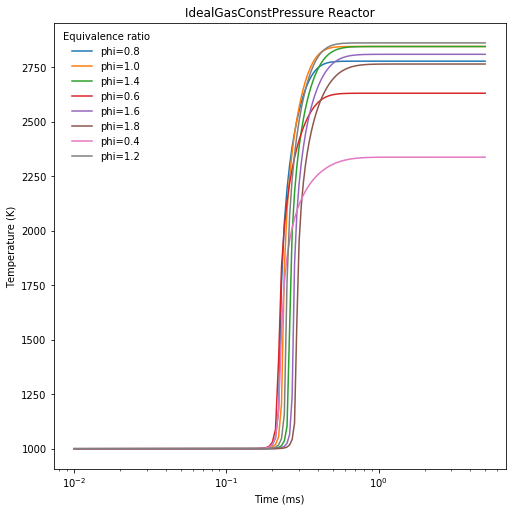

In [16]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(8.,8.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
for f, fuel in enumerate(data):
    df = data[fuel]
    ax.semilogx(1000*df['t (s)'],df['T (K)'],color=col[f],label=fuel) 

# add title/axis labels
ax.set_title(r'IdealGasConstPressure Reactor')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='upper left',#prop={'size':11},
                title='Equivalence ratio') # % mech)
leg.draw_frame(False) 

# show and save
plt.show()